In [14]:
#importing libraries
import numpy as np
import random
import matplotlib.pylab as plt
import warnings

### Generating 2D Gaussian Random Samples for training dataset

In [15]:
mu1=np.array([1,0])
cov1=np.array([[1,0.75],[0.75,1]])

#Gaussian random sample1
random.seed(123)
rand_num1=np.random.multivariate_normal(mu1,cov1,200)
num1=np.array(rand_num1)

#Gaussian random sample2
random.seed(123)
mu2=np.array([0,1])
cov2=np.array([[1,0.5],[-0.5,1]])
rand_num2=np.random.multivariate_normal(mu2,cov2,200)
num2=np.array(rand_num2)

#labeling training dataset with 0 and 1
label1 = np.zeros((num1.shape[0],1))
label2 = np.ones((num2.shape[0],1))
num_1 = np.append(num1,label1, axis=1)
num_2 = np.append(num2,label2, axis=1)


train = np.concatenate((num_1, num_2))
np.random.shuffle(train)

/Users/abhijitdeshpande/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


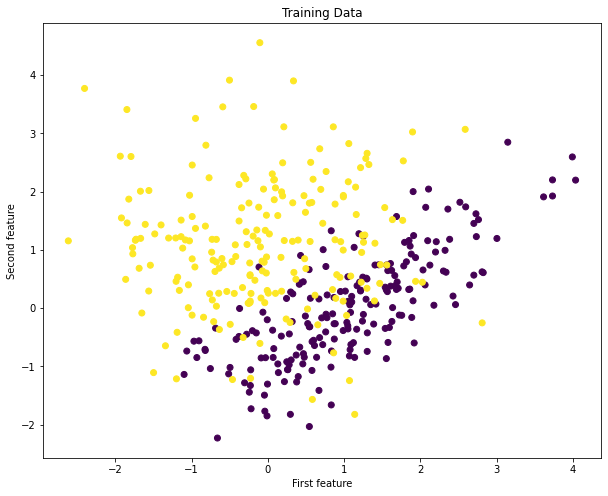

In [16]:
# Plotting actual data
fig = plt.figure(figsize=(10,8))
X = []
X += [list(i) for i in num1]
X += [list(i) for i in num2]
X=np.array(X)
y = [0]*len(num1) + [1]*len(num2) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Training Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Generating 2D Gaussian Random Samples for test dataset

In [17]:
mu1=np.array([1,0])
cov1=np.array([[1,0.75],[0.75,1]])

rand1=np.array(np.random.multivariate_normal(mu1,cov1,50))
rand2=np.array(np.random.multivariate_normal(mu2,cov2,50))

#lableling dataset with 0 and 1
label_1 = np.zeros((rand1.shape[0],1))
label_2 = np.ones((rand2.shape[0],1))
num_11=np.append(rand1,label_1,axis=1)
num_22=np.append(rand2,label_2,axis=1)
test=np.concatenate((num_11,num_22))
np.random.shuffle(test)

/Users/abhijitdeshpande/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


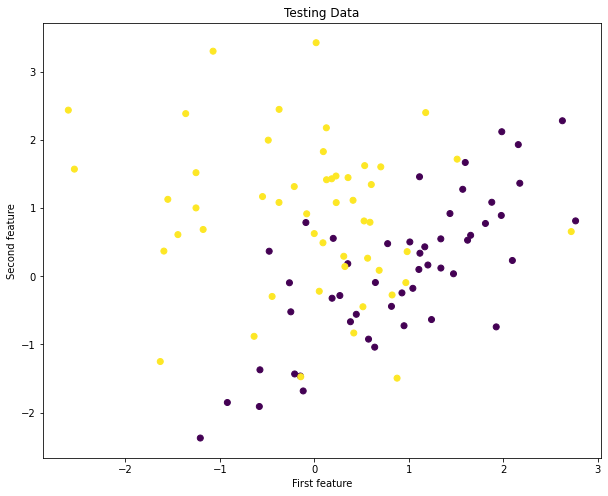

In [18]:
# Plotting actual data
fig = plt.figure(figsize=(10,8))
X = []
X += [list(i) for i in num_11]
X += [list(i) for i in num_22]
X = np.array(X)
y = [0]*len(num_11) + [1]*len(num_22) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Testing Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## KNN Algorithm

In [19]:
#Function to calculate Euclidean Distance between two points
def euclidean_distance(row1,row2):
    distance=[]
    for i in range(len(row1)-1):
        euclidean_distance=np.sqrt(np.sum((row1[i]-row2[i])**2))
        distance.append(euclidean_distance)
    return distance

#Calculate nearest neighbors 
def nearest_neighbor(train,test,k):
    distances=[]
    for train_row in train:
        dist=euclidean_distance(test,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda distances:distances[1])
    neighbors=[]
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors
#predict the classes
def prediction(train,test,k):
    neighbors=nearest_neighbor(train,test,k)
    output_values=[row[2] for row in neighbors]
    prediction=max(set(output_values),key=output_values.count)
    return prediction
#KNN Algorithm
def myknnclass(train,test,k):
    predictions=[]
    for row in test:
        output=prediction(train,row,k)
        predictions.append(output)
    return predictions
#Calculate accuracy
def get_accuracy(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if actual[i]==predicted[i]:
            correct+=1
    return correct/len(predicted)*100

### Testing the Model

In [25]:
#calculating accuracies for different k
acc=[]
range_for_k=[1,2,3,4,5,10,20]
for k in range_for_k:
    predictions=myknnclass(train,test,k)
    accu=get_accuracy(test[:,2],predictions)
    acc.append(accu)
print(acc)

[69.0, 57.99999999999999, 63.0, 57.99999999999999, 65.0, 65.0, 66.0]


In [24]:
#nearest_neighbor(train,test,3)

### K Vs Accuracy

Text(0.5, 1.0, 'Accuracy of KNN for differnt k Values')

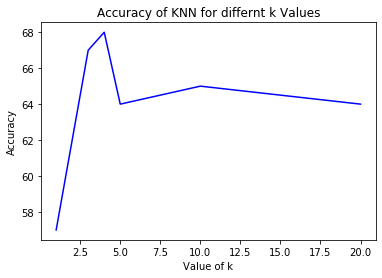

In [12]:
plt.plot(range_for_k,acc,color='b')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN for differnt k Values')

# Problem 2 b

### Generating 2D Gaussian Data

In [15]:
mu1=np.array([1,0])
cov1=np.array([[1,0.75],[0.75,1]])

#generating gaussian numbers
train=np.random.multivariate_normal(mu1,cov1,300)
test=np.random.multivariate_normal(mu1,cov1,100)
guass_noise=np.random.normal(0,0.5)
train_data=[]
test_data=[]
for guass_num in train:
 train_set=2*guass_num[0]+guass_num[1]+guass_noise
 train_data.append(train_set)
for guass_num in test:
 test_set=2*guass_num[0]+guass_num[1]+guass_noise
 test_data.append(test_set)

#Dataset for training and testing algorithm
train_data=(np.array(train_data)).reshape(len(train_data),1)
test_data=(np.array(test_data)).reshape(len(test_data),1)

In [16]:
train_sample=np.append(train,train_data,axis=1)
test_sample=np.append(test,test_data,axis=1)
#X_train,y_train=train_sample[:,:2],train_sample[:,2]
#X_test,y_test=test_sample[:,:2],test_sample[:,2]

### KNN Regression Algorithm

In [76]:
def euclidean_distance(row1,row2):
    distance=[]
    for i in range(len(row1)-1):
        euclidean_distance=np.sqrt(np.sum((row1[i]-row2[i])**2))
        distance.append(euclidean_distance)
    return distance
def myknnregress(train,test,k):
    distances=[]
    for train_row in train:
        dist=euclidean_distance(test,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda distances:distances[1])
    average=[]
    for i in range(k):
        average.append(distances[i][-1])
    return (np.sum(average))/len(average)
def get_accuracy(train_sample,test_sample,k):
    sse=0
    for test in test_sample:
        predicted=myknnregress(train_sample,test,k)
        sse+=(predicted-test[-1])**2
    return np.sqrt(sse/len(test_sample))

### Testing KNN Reg Algorithm for different k values

In [77]:
list_k=[1, 2, 3, 5, 10, 20, 50, 100]
acc=[]
for k in list_k:
 accu=get_accuracy(train_sample,test_sample,k)
 acc.append(accu)
print(acc)

[3.0714272999655607, 3.0153585824743945, 2.9959795038049806, 2.9793331446575113, 2.9872170432643808, 2.960571314001657, 2.9300649362298086, 2.872950247268717]


##### k vs Accuarcy 

Text(0.5, 1.0, 'RSME of KNN Reg for differnt k Values')

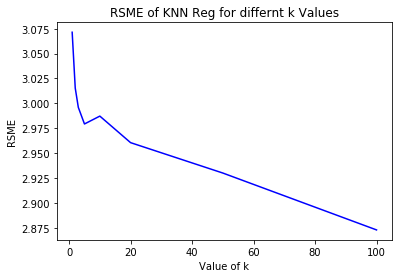

In [78]:
plt.plot(list_k,acc,color='b')
plt.xlabel('Value of k')
plt.ylabel('RSME')
plt.title('RSME of KNN Reg for differnt k Values')

## Problem 2 c

In [79]:
train_sample=np.append(train,train_data,axis=1)
test_sample=np.append(test,test_data,axis=1)
X_train,y_train=train_sample[:,:2],train_sample[:,2]
X_test,y_test=test_sample[:,:2],test_sample[:,2]

In [80]:
#Calculating Beta Values 
dot_product=np.dot(X_train.transpose(),X_train)
inverse=np.linalg.inv(dot_product)
beta_values=np.dot(inverse,X_train.transpose())
final=np.dot(beta_values,y_train)

In [81]:
#prediction
prediction=np.dot(X_test,final)

In [82]:
def euclidean_distance(row1,row2):
    distance=[]
    for i in range(len(row1)-1):
        euclidean_distance=np.sqrt(np.sum((row1[i]-row2[i])**2))
        distance.append(euclidean_distance)
    return distance
def myknnregress(train,test,k):
    distances=[]
    for train_row in train:
        dist=euclidean_distance(test,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda distances:distances[1])
    average=[]
    for i in range(k):
        average.append(distances[i][-1])
    return (np.sum(average))/len(average)
def get_accuracy(train_sample,test_sample,k):
    lse=0
    for test in test_sample:
        predicted=myknnregress(train_sample,test,k)
        lse+=(predicted-test[-1])
    return lse

In [83]:
#Calculating accuracy
list_k=[1, 2, 3, 5, 10, 20, 50, 100]
acc=[]
for k in list_k:
 accu=get_accuracy(X_train,X_test,k)
 acc.append(accu)
print(acc)

[3.240208932241926, 3.548892078601754, 4.029628418736429, 4.963495643105078, 6.979644172347912, 10.798659301956455, 21.398190693335923, 38.5235322783018]


Text(0.5, 1.0, 'LSE of KNN Reg for differnt k Values')

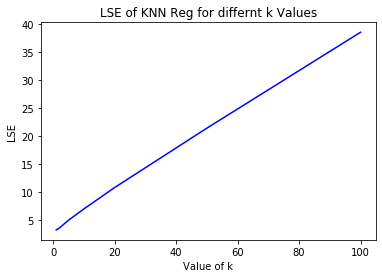

In [84]:
plt.plot(list_k,acc,color='b')
plt.xlabel('Value of k')
plt.ylabel('LSE')
plt.title('LSE of KNN Reg for differnt k Values')